In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# K1 function
def k(r):
    return 2 * np.arctan(r)  / np.pi
# K1 function inverse
def kinv(r):
    return np.tan(np.pi * r / 2)
# K1 function derivative
def dk(r):
    return 2 / (np.pi * (1 + r**2))

In [50]:
# Parameters
r2 = 0.5
r1 = 1
h = 0.02#0.0651318636497
x0 = 10

In [51]:
# Exact solution
def sol(t, x0, r2, r1):
    if t < k(np.abs(x0))**(1 - r2) * r1:
        return kinv((k(np.abs(x0))**(1 - r2) - t / r1)**(1 / (1 - r2))) * np.sign(x0)
    elif t >= k(np.abs(x0))**(1 - r2) * r1:
        return 0

In [52]:
# Generation of exact solution
tc = np.linspace(0, 1.5*r1, 101)
xc = np.vectorize(sol)(tc, x0, r2, r1)

In [53]:
# Discrete-time simulation
xk = [x0]
for j in range(int(1.5*np.ceil(r1/h))):
    xk.append(kinv(max(k(np.abs(xk[-1]))**(1-r2)-h/r1, 0)**(1/(1-r2)))*np.sign(xk[-1]))
    
xk = np.array(xk)

In [54]:
# Euler integration algorithm (will be used to compare)
def ode1(func, x0, t0, tf, h):
    t = np.arange(t0, tf+h, h)
    x = np.zeros((np.size(x0), t.size))
    x[:, 0] = x0
    for i in range(1, t.size):
        x[:, i] = h * func(t[i-1], x[:, i-1]) + x[:, i-1]
    return t, x

In [55]:
# Continuous-time predefined-time function
def sys(t, x):
    r2 = 0.5
    r1 = 1
    return -(k(np.abs(x))**r2 / dk(np.abs(x)) * np.sign(x)) / (r1 * (1 - r2))

In [56]:
# Explicit Euler simulation
t0, tf = 0, 1.5*r1
te, xe = ode1(sys, x0, t0, tf, h)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


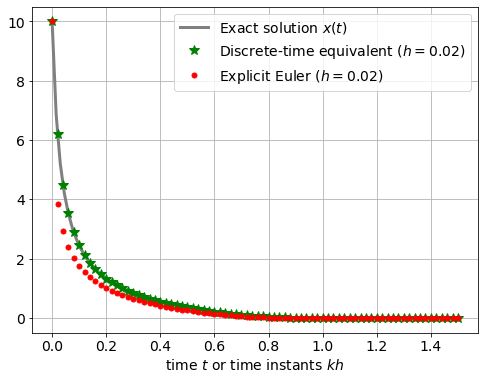

In [57]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.plot(tc, xc, lw = 3, color=0.5*np.ones((3,)), label='Exact solution $x(t)$')
plt.plot(np.arange(int(1.5*np.ceil(r1/h))+1)*h, xk, 'g*', ms=10, label=f'Discrete-time equivalent ($h={h}$)')
plt.plot(te, xe[0], 'r.', ms=10, label=f'Explicit Euler ($h={h}$)')
plt.grid()
plt.xlabel('time $t$ or time instants $kh$')
plt.legend(loc='best')
plt.savefig('figures/consistent02.eps', bbox_inches='tight', format='eps', dpi=1500)

In [48]:
len(xe[0]), len(xk)

(25, 25)

In [12]:
# Compare: the discretization coincides with the exact solution in the time samples (even after Tc)
np.vectorize(sol)(np.arange(int(np.ceil(r1/h))+1) * h, x0, r2, r1) - xk

array([1.06581410e-14, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.10862447e-15, 2.22044605e-15,
       3.99680289e-15, 3.55271368e-15, 1.33226763e-15, 1.77635684e-15,
       2.66453526e-15, 1.11022302e-15, 0.00000000e+00, 8.88178420e-16,
       1.55431223e-15, 4.44089210e-16, 2.22044605e-16, 6.66133815e-16,
       6.66133815e-16, 1.55431223e-15, 8.88178420e-16, 1.11022302e-15,
       1.33226763e-15, 1.11022302e-15, 8.88178420e-16, 8.88178420e-16,
       7.77156117e-16, 1.33226763e-15, 1.11022302e-15, 1.11022302e-15,
       1.11022302e-15, 1.11022302e-15, 7.77156117e-16, 6.66133815e-16,
       5.55111512e-16, 4.44089210e-16, 5.55111512e-16, 6.66133815e-16,
       4.44089210e-16, 5.55111512e-16, 4.44089210e-16, 3.88578059e-16,
       3.88578059e-16, 4.44089210e-16, 4.99600361e-16, 4.99600361e-16,
       4.99600361e-16, 4.44089210e-16, 3.88578059e-16, 3.33066907e-16,
       3.88578059e-16, 4.44089210e-16, 4.44089210e-16, 3.33066907e-16,
      

In [13]:
xk

array([1.00000000e+01, 7.65401773e+00, 6.20264257e+00, 5.21475087e+00,
       4.49791710e+00, 3.95330061e+00, 3.52491967e+00, 3.17869271e+00,
       2.89268287e+00, 2.65213078e+00, 2.44674085e+00, 2.26911231e+00,
       2.11378852e+00, 1.97665791e+00, 1.85456354e+00, 1.74504123e+00,
       1.64613942e+00, 1.55629247e+00, 1.47422975e+00, 1.39890933e+00,
       1.32946874e+00, 1.26518796e+00, 1.20546121e+00, 1.14977519e+00,
       1.09769209e+00, 1.04883628e+00, 1.00288365e+00, 9.59553124e-01,
       9.18599771e-01, 8.79809234e-01, 8.42993126e-01, 8.07985259e-01,
       7.74638503e-01, 7.42822173e-01, 7.12419831e-01, 6.83327437e-01,
       6.55451779e-01, 6.28709141e-01, 6.03024162e-01, 5.78328859e-01,
       5.54561781e-01, 5.31667286e-01, 5.09594903e-01, 4.88298788e-01,
       4.67737237e-01, 4.47872271e-01, 4.28669263e-01, 4.10096609e-01,
       3.92125448e-01, 3.74729398e-01, 3.57884334e-01, 3.41568184e-01,
       3.25760748e-01, 3.10443538e-01, 2.95599629e-01, 2.81213532e-01,
      

In [14]:
np.vectorize(sol)(np.arange(int(np.ceil(r1/h))+1) * h, x0, r2, r1)

array([1.00000000e+01, 7.65401773e+00, 6.20264257e+00, 5.21475087e+00,
       4.49791710e+00, 3.95330061e+00, 3.52491967e+00, 3.17869271e+00,
       2.89268287e+00, 2.65213078e+00, 2.44674085e+00, 2.26911231e+00,
       2.11378852e+00, 1.97665791e+00, 1.85456354e+00, 1.74504123e+00,
       1.64613942e+00, 1.55629247e+00, 1.47422975e+00, 1.39890933e+00,
       1.32946874e+00, 1.26518796e+00, 1.20546121e+00, 1.14977519e+00,
       1.09769209e+00, 1.04883628e+00, 1.00288365e+00, 9.59553124e-01,
       9.18599771e-01, 8.79809234e-01, 8.42993126e-01, 8.07985259e-01,
       7.74638503e-01, 7.42822173e-01, 7.12419831e-01, 6.83327437e-01,
       6.55451779e-01, 6.28709141e-01, 6.03024162e-01, 5.78328859e-01,
       5.54561781e-01, 5.31667286e-01, 5.09594903e-01, 4.88298788e-01,
       4.67737237e-01, 4.47872271e-01, 4.28669263e-01, 4.10096609e-01,
       3.92125448e-01, 3.74729398e-01, 3.57884334e-01, 3.41568184e-01,
       3.25760748e-01, 3.10443538e-01, 2.95599629e-01, 2.81213532e-01,
      